# Customer Churn Predictions Using Classification Analysis

Churn refers to the number of customers who stop using a product or service over a given period of time. Customers churn for various reasons such as poor customer service, product dissatisfaction, price sensitivity, better alternatives, and changes in circumstances, e.g. relocation. A data analyst finds the factors causing churn in data and works towards preventing it.

Churn prediction is the process of using data and analytical models to identify which customers are most likely to stop doing business with or using a company’s product or service in the near future. 

Data analytics professionals typically use machine learning algorithms such as logistic regression, decision trees, and support vector machines to predict customer churn using classification analysis. These algorithms analyze data such as customer demographics, purchase history, and interactions with the company to identify patterns that can predict customer churn.

**Dataset used: telco-dataset**
21 columns

Customers who left within the last month — the column is called Churn

Each customer has signed up for services such as phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

Customer account information — how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers — gender, age range, and if they have partners and dependents

In [4]:
# Data Handling
import pandas as pd
import numpy as np

In [5]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.offline as po
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline

In [14]:
# EDA (pandas profiling, etc)  UNABLE TO INSTALL THE PACKAGE
#!pip install ydata_profiling 
#import ydata_profiling as pp

In [108]:
# Feature processing
import sklearn
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [15]:
# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


In [17]:
# Other packages
import os, pickle
import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [55]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

## Exploratory Data Analysis

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [57]:
# Get the statistics for the numeric columns
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [58]:
# Checking if SeniorCitizen column is categorical with numeric values
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [59]:
# Checking for missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [60]:
# Check for duplicate rows
df_dup = df[df.duplicated()]
df_dup
#OR df.duplicated().sum()

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

In [61]:
df.shape

(7043, 21)

In [62]:
# check if the data is balanced
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [63]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [64]:
# Convert TotalCharges column from object to float
#df['TotalCharges'] = df['TotalCharges'].astype(float)

# replace the spaces with nan
df['TotalCharges'].replace(' ', np.nan, inplace = True)

#Drop the null value feature which contain .50% missing values
df = df[df['TotalCharges'].notnull()]
df = df.reset_index()[df.columns]

#Convert 'TotalCharges' column to float datatype
#df['TotalCharges'] = pd.to_numeric(df['TotalCharges']) OR
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [65]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [66]:
# Check for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [67]:
# convert string values 'yes' and 'no' to numeric values '1' and '0' in churn column because of our ML model
df.loc[df.Churn == 'Yes', 'Churn'] =  1
df.loc[df.Churn == 'No', 'Churn'] =  0

In [68]:
# convert string values 'Female' and 'Male' to numeric values '1' and '0' in gender column
df.loc[df.gender == 'Male', 'gender'] = 0
df.loc[df.gender == 'Female', 'gender'] = 1

In [69]:
# convert string values 'yes' and 'no' to numeric values '1' and '0' in partner column 
df.loc[df.Partner == 'Yes', 'Partner'] =  1
df.loc[df.Partner == 'No', 'Partner'] =  0

In [70]:
# convert string values 'yes' and 'no' to numeric values '1' and '0' in Dependents column 
df.loc[df.Dependents == 'Yes', 'Dependents'] =  1
df.loc[df.Dependents == 'No', 'Dependents'] =  0

In [71]:
# convert string values 'yes' and 'no' to numeric values '1' and '0' in PhoneService column 
df.loc[df.PhoneService == 'Yes', 'PhoneService'] =  1
df.loc[df.PhoneService == 'No', 'PhoneService'] =  0

In [72]:
# convert string values 'yes' and 'no' to numeric values '1' and '0' in PaperlessBilling column 
df.loc[df.PaperlessBilling == 'Yes', 'PaperlessBilling'] =  1
df.loc[df.PaperlessBilling == 'No', 'PaperlessBilling'] =  0

In [73]:
# convert 'No internet service' to 'No' for columns 'OnlineBackup','StreamingMovies','DeviceProtection'
# ,'TechSupport','OnlineSecurity','StreamingTV'
cols = ['OnlineBackup','StreamingMovies','DeviceProtection','TechSupport','OnlineSecurity','StreamingTV']
for i in cols:
    df[i] = df[i].replace({'No internet service': 'No'})

In [74]:
#Replace 'No internet service' and 'No phone service' with 'No'
df.replace(['No internet service', 'No phone service'], 'No', inplace= True)

In [76]:
# value count on 'Churn'  #Distribution of target column
df['Churn'].value_counts().values

array([5163, 1869], dtype=int64)

=> This shows there is slight imbalance in the data.

## Data Visualization

It is the process of representing data visually through charts, graphs, and other visual elements to gain insights, identify patterns, and communicate information effectively. It helps to understand complex datasets, explore relationships, and present findings in a visually appealing and easily understandable manner.

In [78]:
#visualizing the total customer churn
churn_labels = df['Churn'].value_counts().keys().tolist()
churn_values = df["Churn"].value_counts().values.tolist()

plot_data = [go.Pie(labels = churn_labels, 
                   values = churn_values,
                   marker = dict(colors=['grey', 'orange'], line=dict(color = 'purple', width=1.5)),
                   rotation = 90,
                   hoverinfo = "label+value+text",
                   hole = .6)
            ]

plot_layout = go.Layout(dict(title = 'Customer Churn',
                            plot_bgcolor = 'rgb(243,243,243)',
                            paper_bgcolor = 'rgb(243,243,243)'))

fig = go.Figure(data=plot_data, layout = plot_layout)
po.iplot(fig)

<Axes: xlabel='Churn', ylabel='count'>

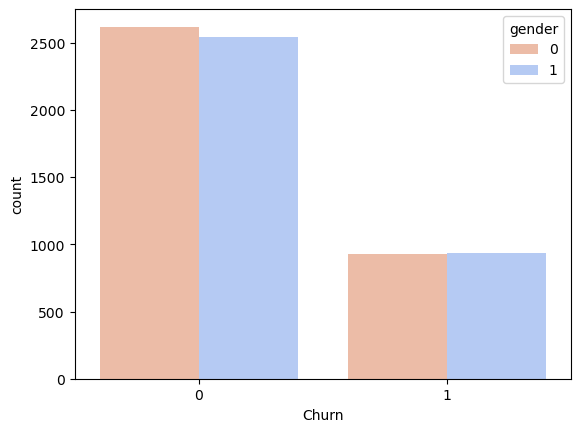

In [79]:
sns.countplot(x='Churn', data = df, hue= 'gender', palette = 'coolwarm_r')

In [80]:
#visualize churn by gender
plot_by_gender = df.groupby('gender').Churn.mean().reset_index()

plot_data = [go.Bar(x=plot_by_gender['gender'],
                    y=plot_by_gender['Churn'],
                    width=[0.3, 0.3],
                    marker=dict(color=['red','purple'])
            )]
plot_layout = go.Layout(xaxis={"type":"category"},
                        yaxis={"title":"Churn"},
                        title='Churn by Gender',
                        plot_bgcolor='rgb(243,243,243)',
                        paper_bgcolor='rgb(243,243,243)',
                        )
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)

From the above graph, churn for both male and female is almost similar but female’s was slightly higher.

In [81]:
plot_by_TechSupport = df.groupby('TechSupport').Churn.mean().reset_index()
plot_by_TechSupport

TechSupport     Churn
0          No  0.312300
1         Yes  0.151961

In [82]:
#visualize churn by TechSupport
#plot_by_TechSupport = df.groupby('TechSupport').Churn.mean().reset_index()

plot_data = [go.Bar(x=plot_by_TechSupport['TechSupport'],
                    y=plot_by_TechSupport['Churn'],
                    width=[0.3, 0.3],
                    marker=dict(color=['red','purple'])
            )]
plot_layout = go.Layout(xaxis={"type":"category"},
                        yaxis={"title":"Churn"},
                        title='Churn by TechSupport',
                        plot_bgcolor='rgb(243,243,243)',
                        paper_bgcolor='rgb(243,243,243)',
                        )
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)

From the above, it is observed that the customers that did not have TechSuport had the highest attrition. It’s therefore necessary to initiate measure of encouraging more customers to use TechSupport services in order to reduce the customers’ turnover probability.

In [83]:
#visualize churn by PaymentMethod
plot_by_PaymentMethod = df.groupby('PaymentMethod').Churn.mean().reset_index()

plot_data = [go.Bar(x=plot_by_PaymentMethod['PaymentMethod'],
                    y=plot_by_PaymentMethod['Churn'],
                    width=[0.3, 0.3],
                    marker=dict(color=['red','purple'])
            )]
plot_layout = go.Layout(xaxis={"type":"category"},
                        yaxis={"title":"Churn"},
                        title='Churn by PaymentMethod',
                        plot_bgcolor='rgb(243,243,243)',
                        paper_bgcolor='rgb(243,243,243)',
                    )
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)

Based on the findings above, we can observe that payment method does have an impact on customer churn. However, we can conclude that customers using electronic check as their payment method have a significantly higher churn rate compared to other payment methods.
This insight can help inform strategies to reduce churn, such as promoting alternative payment methods or providing incentives for customers to switch from electronic check to more stable payment methods.

In [84]:
#visualize churn by InternetService
plot_by_InternetService = df.groupby('InternetService').Churn.mean().reset_index()

plot_data = [go.Bar(x=plot_by_InternetService['InternetService'],
                    y=plot_by_InternetService['Churn'],
                    width=[0.3, 0.3],
                    marker=dict(color=['red','purple'])
            )]
plot_layout = go.Layout(xaxis={"type":"category"},
                        yaxis={"title":"Churn"},
                        title='Churn by InternetService',
                        plot_bgcolor='rgb(243,243,243)',
                        paper_bgcolor='rgb(243,243,243)',
                    )
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)

Customers with fiber optic as InternetService are most likely to churn
One of the reasons could be price

In [86]:
#visualize churn by Contract
plot_by_Contract = df.groupby('Contract').Churn.mean().reset_index()
plot_data = [go.Bar(x=plot_by_Contract['Contract'],
                    y=plot_by_Contract['Churn'],
                    width=[0.3, 0.3],
                    marker=dict(color=['red','purple'])
                )]
plot_layout = go.Layout(xaxis={"type":"category"},
                        yaxis={"title":"Churn"},
                        title='Churn by Contract',
                        plot_bgcolor='rgb(243,243,243)',
                        paper_bgcolor='rgb(243,243,243)',
                    )
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)

From the graph Churn by Contract, we can see that more customers that churn have the Month-to-Month subscription. We can therefore conclude that there is a negative correlation between the contract length and customer churn; i.e the shorter the contract length, the more likely the customer will churn.

In [87]:
#visualize churn by Tenure
plot_by_tenure = df.groupby('tenure').Churn.mean().reset_index()
plot_data = [go.Bar(
                    x=plot_by_tenure['tenure'],
                    y=plot_by_tenure['Churn'],

                    width=[0.3, 0.3],
                    marker=dict(color=['red','purple'])
                )]
plot_layout = go.Layout(
                        xaxis={"type":"category"},
                        yaxis={"title":"Churn"},
                        title='Churn by Tenure',
                        plot_bgcolor='rgb(243,243,243)',
                        paper_bgcolor='rgb(243,243,243)',
                    )
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)

The higher the tenure the lower the churn

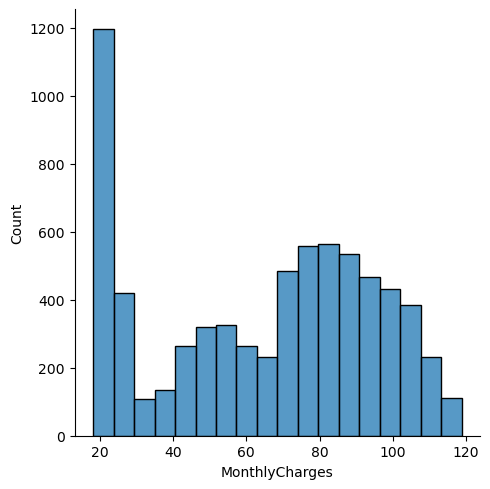

In [88]:
# visualize the distribution of 'MonthlyCharges'
sns.displot(df, x = df['MonthlyCharges'])

In [91]:
# combine two columns together
df['security_backup'] = df.OnlineSecurity + df.OnlineBackup

In [93]:
df['security_backup'].value_counts()

NoNo      3715
NoYes     1302
YesYes    1123
YesNo      892
Name: security_backup, dtype: int64

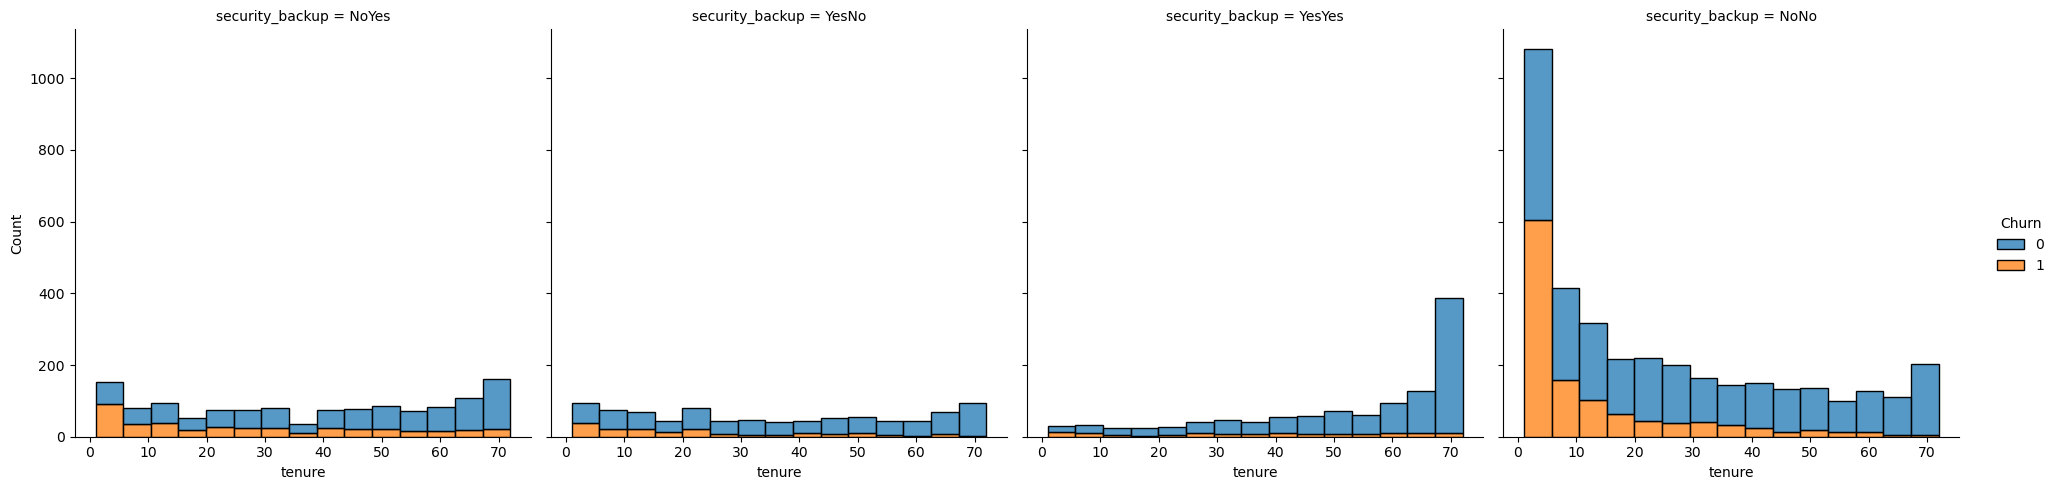

In [94]:
df['security_backup'] = df.security_backup.replace({2:1})
sns.displot(df,x='tenure',col='security_backup',hue='Churn',multiple='stack')

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

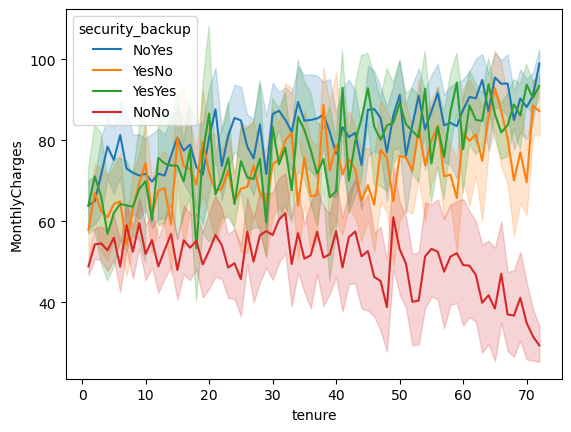

In [95]:
sns.lineplot(x='tenure', y='MonthlyCharges',hue='security_backup',data=df )

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  


In [97]:
# Visualizing Categorical features 
#countplot 
cat_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
              'Contract', 'PaperlessBilling']

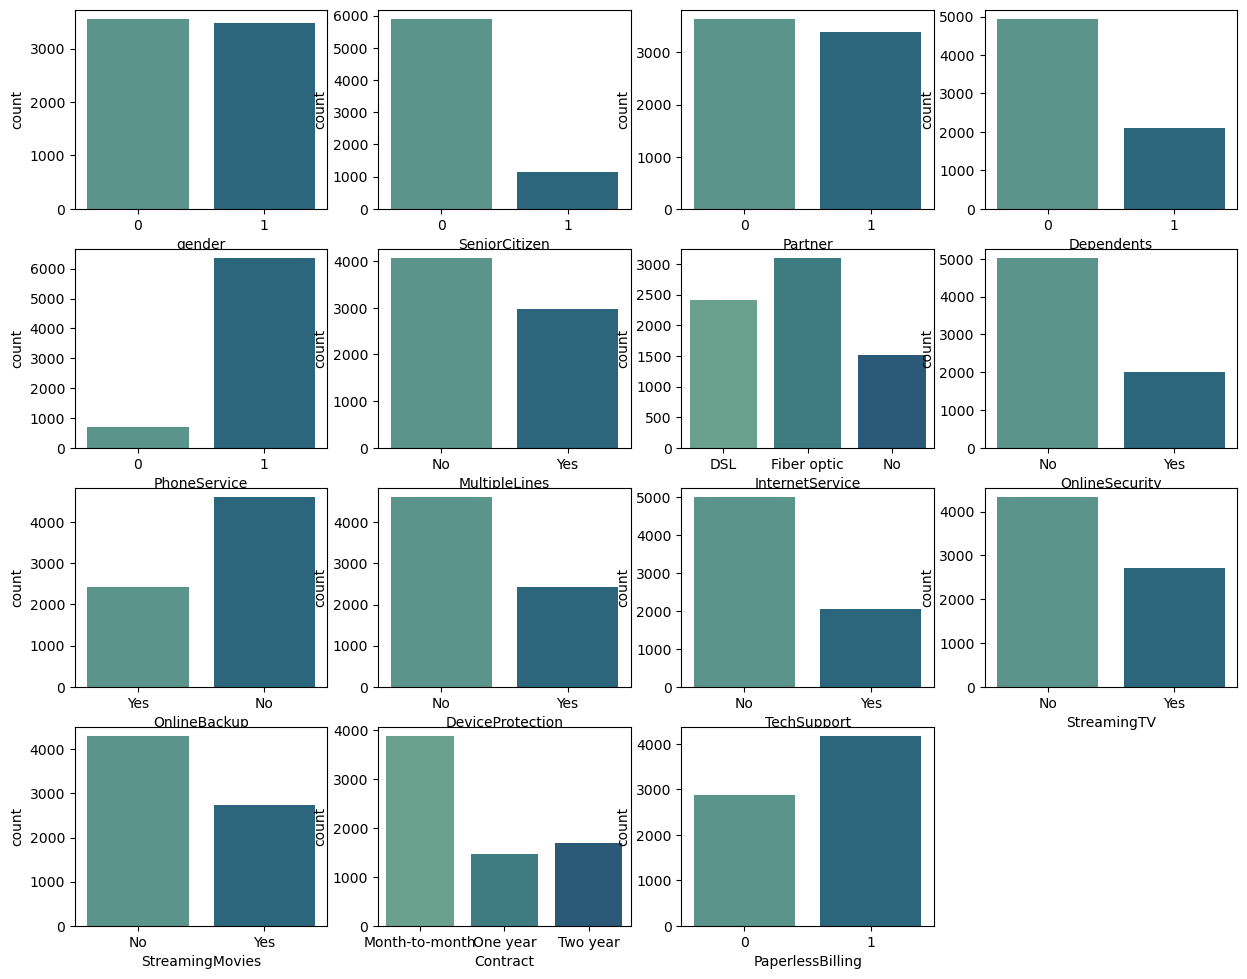

In [98]:
plt.figure(figsize=(15, 15))

for n, variable in enumerate(cat_cols):
    ax = plt.subplot(5, 4, n + 1)
    g = sns.countplot(data=df, x=df[variable], ax=ax, palette='crest')
plt.show() 


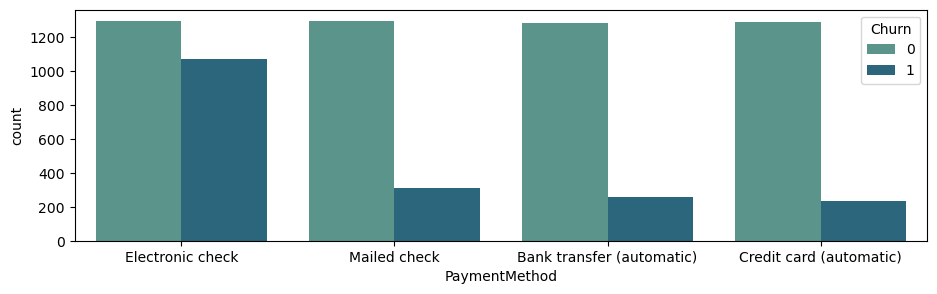

<Figure size 640x480 with 0 Axes>

In [99]:
plt.figure(figsize=(11,3))
_ = sns.countplot(x= 'PaymentMethod', hue='Churn', data=df, palette='crest')
plt.show() 
plt.tight_layout()

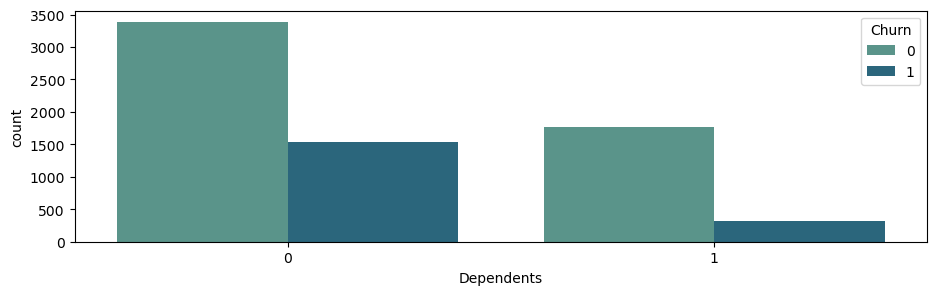

<Figure size 640x480 with 0 Axes>

In [100]:
plt.figure(figsize=(11,3))
_ = sns.countplot(x= 'Dependents', hue='Churn', data=df, palette='crest')
plt.show() 
plt.tight_layout()

From the dependents graph above, we can coclude that customers with dependants are less likey to churn compared to those without dependents

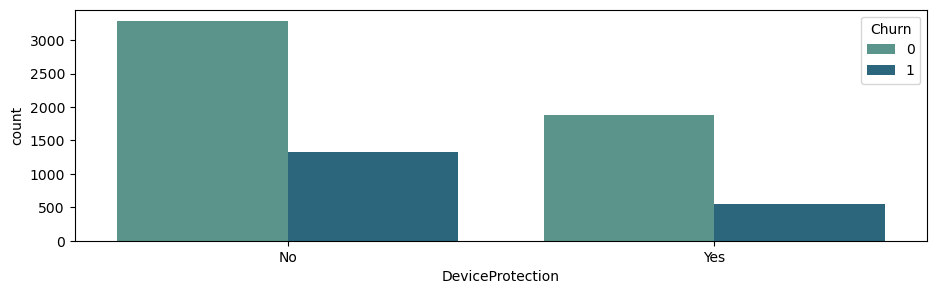

<Figure size 640x480 with 0 Axes>

In [101]:
plt.figure(figsize=(11,3))
_ = sns.countplot(x= 'DeviceProtection', hue='Churn', data=df, palette='crest')
plt.show() 
plt.tight_layout()

From the DeviceProtection graph above, it is noted that many customers who churned did not have device protection.
Therefore, the team must formulate incentive strategies to encourage customers to use the device protection service_.

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

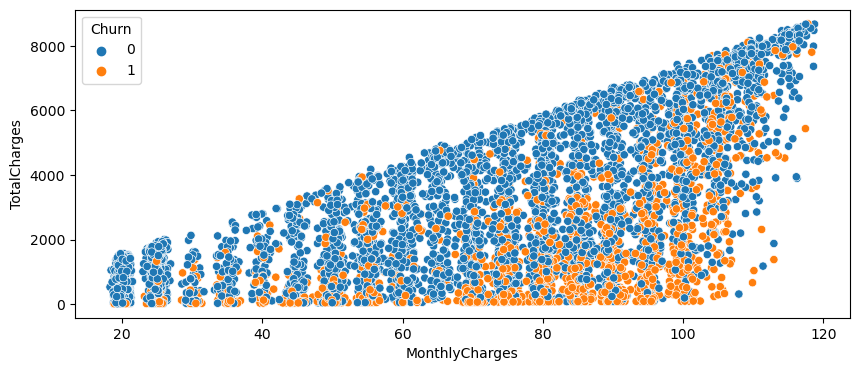

In [102]:
# Plot ‘MonthlyCharges’ vs ‘TotalCharges’
# Scatter plot
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

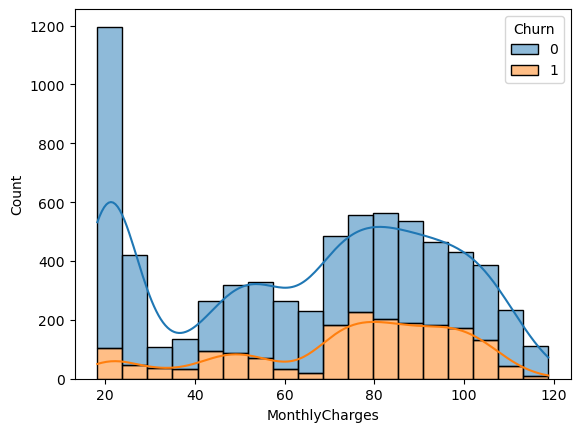

In [103]:
# Using a Histogram, visualize monthly charges and churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True)
plt.show()

## Correlation between numerical features and target variable

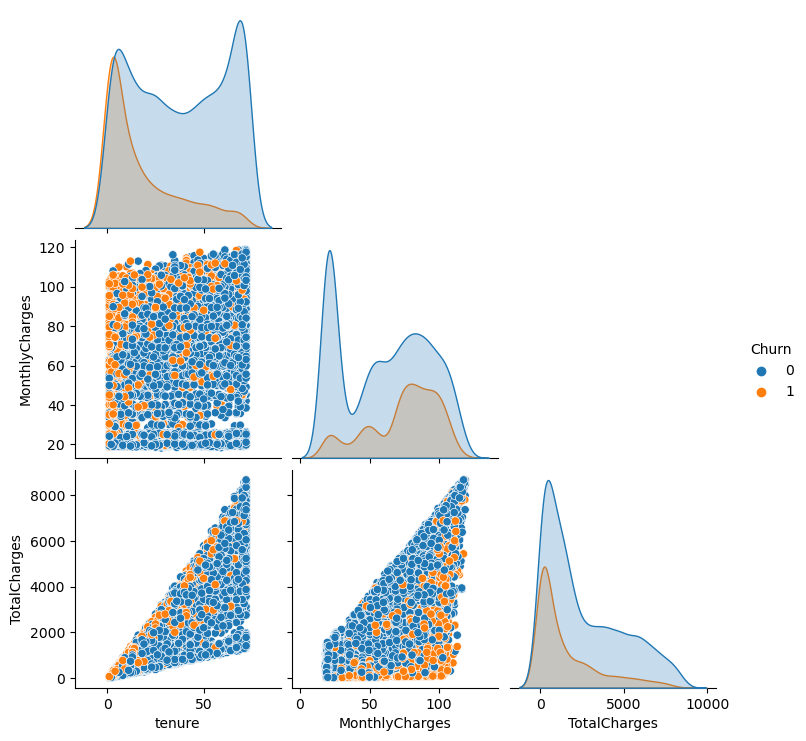

In [104]:
# Check the correlation between numerical features and target variable
# Numerical feature = 'tenure', 'MonthlyCharges', 'TotalCharges'
# Target variable = 'Churn'

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_num = df[numerical_cols + ['Churn']]
sns.pairplot(df_num, hue='Churn', corner=True)
plt.show()

From the graphs above, we see that most people with low tenure and high monthly charge are most likely to churn

Correlation matrix of all features

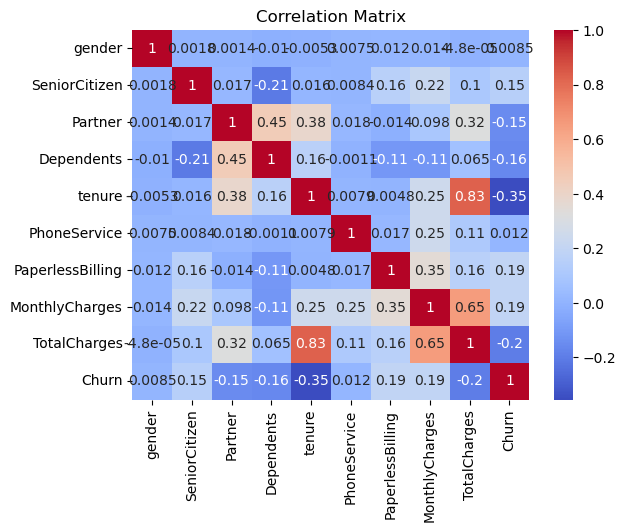

In [107]:
df_corr = df.corr()
sns.heatmap(df_corr, annot= True, cmap= 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

=> Tenure and TotalCharges are highly correlated as well as MonthlyCharges and TotalCharges.

## FEATURE PROCESSING AND ENGINEERING

Feature engineering is the process of creating new features or transforming existing features in a dataset to improve the performance of machine learning models. It involves extracting relevant information from raw data, selecting informative features, and creating new representations that better capture the underlying patterns and relationships in the data.

Some common techniques used in feature engineering:
    
**Imputation** : Handling missing values in the dataset by imputing them with appropriate values based on the nature of the data.

**One-Hot Encoding** : Converting categorical variables into binary/dummy variables to represent different categories as separate features.

**Label Encoding** : Assigning a unique numerical value to each category in a categorical variable, often used when the order of categories matters.

**Scaling** : Standardizing or normalizing numerical features to bring them to a similar scale, allowing models to interpret them equally.

### Feature Encoding

In [118]:
# From sklearn.preprocessing use OneHotEncoder to encode the categorical features.
# Columns to be one-hot encoded
columns_to_encode = ['Contract', 'gender', 'DeviceProtection', 'MultipleLines', 'InternetService',
                     'OnlineBackup', 'OnlineSecurity', 'PaymentMethod', 'SeniorCitizen', 'StreamingMovies',
                     'StreamingTV', 'TechSupport']

# One-hot encoding
onehot_encoder = OneHotEncoder(sparse= False)
onehot_encoded = onehot_encoder.fit_transform(pd.DataFrame(df)[columns_to_encode])

In [119]:
onehot_encoder.get_feature_names_out(columns_to_encode)

array(['Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'gender_0', 'gender_1', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'SeniorCitizen_0', 'SeniorCitizen_1', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'TechSupport_No', 'TechSupport_Yes'], dtype=object)

In [120]:
# Create a new DataFrame with one-hot encoded columns
df_onehot = pd.DataFrame(onehot_encoded, columns = onehot_encoder.get_feature_names_out(columns_to_encode))
df_onehot.head(5)

Contract_Month-to-month  Contract_One year  Contract_Two year  gender_0  \
0                      1.0                0.0                0.0       0.0   
1                      0.0                1.0                0.0       1.0   
2                      1.0                0.0                0.0       1.0   
3                      0.0                1.0                0.0       1.0   
4                      1.0                0.0                0.0       0.0   

   gender_1  DeviceProtection_No  DeviceProtection_Yes  MultipleLines_No  \
0       1.0                  1.0                   0.0               1.0   
1       0.0                  0.0                   1.0               1.0   
2       0.0                  1.0                   0.0               1.0   
3       0.0                  0.0                   1.0               1.0   
4       1.0                  1.0                   0.0               1.0   

   MultipleLines_Yes  InternetService_DSL  ...  \
0                0.0                  1.0  ...   
1                0.0                  1.0  ...   
2                0.0                  1.0  ...   
3                0.0                  1.0  ...   
4                0.0                  0.0  ...   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
0                             1.0                         0.0   
1                             0.0                         1.0   
2                             0.0                         1.0   
3                             0.0                         0.0   
4                             1.0                         0.0   

   SeniorCitizen_0  SeniorCitizen_1  StreamingMovies_No  StreamingMovies_Yes  \
0              1.0              0.0                 1.0                  0.0   
1              1.0              0.0                 1.0                  0.0   
2              1.0              0.0                 1.0                  0.0   
3              1.0              0.0                 1.0                  0.0   
4              1.0              0.0                 1.0                  0.0   

   StreamingTV_No  StreamingTV_Yes  TechSupport_No  TechSupport_Yes  
0             1.0              0.0             1.0              0.0  
1             1.0              0.0             1.0              0.0  
2             1.0              0.0             1.0              0.0  
3             1.0              0.0             0.0              1.0  
4             1.0              0.0             1.0              0.0  

[5 rows x 28 columns]

In [121]:
# Find the columns increased and have suffixes from One hot encoding
df_onehot.columns

Index(['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'gender_0', 'gender_1', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'SeniorCitizen_0', 'SeniorCitizen_1', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'TechSupport_No', 'TechSupport_Yes'],
      dtype='object')

### Feature Scaling

In [123]:
# The columns to perform feature scaling on are 'tenure','MonthlyCharges' to have them on one scale
Cols_ft_scaling = ['tenure','MonthlyCharges', 'TotalCharges']

In [124]:
# Perform feature scaling on the dataset using the fit_transform method
std_scaler = StandardScaler()
scaled_features = std_scaler.fit_transform(df[Cols_ft_scaling])

In [125]:
scaled_features

array([[-1.28024804, -1.16169394, -0.99419409],
       [ 0.06430269, -0.26087792, -0.17373982],
       [-1.23950408, -0.36392329, -0.95964911],
       ...,
       [-0.87280842, -1.17000405, -0.85451414],
       [-1.15801615,  0.31916782, -0.87209546],
       [ 1.36810945,  1.35793167,  2.01234407]])

In [126]:
# Creating a new DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_features, columns = Cols_ft_scaling)

In [127]:
df_scaled

tenure  MonthlyCharges  TotalCharges
0    -1.280248       -1.161694     -0.994194
1     0.064303       -0.260878     -0.173740
2    -1.239504       -0.363923     -0.959649
3     0.512486       -0.747850     -0.195248
4    -1.239504        0.196178     -0.940457
...        ...             ...           ...
7027 -0.343137        0.664868     -0.129180
7028  1.612573        1.276493      2.241056
7029 -0.872808       -1.170004     -0.854514
7030 -1.158016        0.319168     -0.872095
7031  1.368109        1.357932      2.012344

[7032 rows x 3 columns]

In [142]:
# Reset index so that when we concat the two dataframes, there will be no NaN values.
df_scaled.reset_index(drop=True, inplace=True)
df_onehot.reset_index(drop=True, inplace=True)

# OR we can replace the index of scaled with that of onehot
#df_scaled.index = df_onehot.index

In [145]:
df_scaled.head(4)

tenure  MonthlyCharges  TotalCharges
0 -1.280248       -1.161694     -0.994194
1  0.064303       -0.260878     -0.173740
2 -1.239504       -0.363923     -0.959649
3  0.512486       -0.747850     -0.195248

In [146]:
df_onehot.head(4)

Contract_Month-to-month  Contract_One year  Contract_Two year  gender_0  \
0                      1.0                0.0                0.0       0.0   
1                      0.0                1.0                0.0       1.0   
2                      1.0                0.0                0.0       1.0   
3                      0.0                1.0                0.0       1.0   

   gender_1  DeviceProtection_No  DeviceProtection_Yes  MultipleLines_No  \
0       1.0                  1.0                   0.0               1.0   
1       0.0                  0.0                   1.0               1.0   
2       0.0                  1.0                   0.0               1.0   
3       0.0                  0.0                   1.0               1.0   

   MultipleLines_Yes  InternetService_DSL  ...  \
0                0.0                  1.0  ...   
1                0.0                  1.0  ...   
2                0.0                  1.0  ...   
3                0.0                  1.0  ...   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
0                             1.0                         0.0   
1                             0.0                         1.0   
2                             0.0                         1.0   
3                             0.0                         0.0   

   SeniorCitizen_0  SeniorCitizen_1  StreamingMovies_No  StreamingMovies_Yes  \
0              1.0              0.0                 1.0                  0.0   
1              1.0              0.0                 1.0                  0.0   
2              1.0              0.0                 1.0                  0.0   
3              1.0              0.0                 1.0                  0.0   

   StreamingTV_No  StreamingTV_Yes  TechSupport_No  TechSupport_Yes  
0             1.0              0.0             1.0              0.0  
1             1.0              0.0             1.0              0.0  
2             1.0              0.0             1.0              0.0  
3             1.0              0.0             0.0              1.0  

[4 rows x 28 columns]

In [149]:
# Create a DataFrame with scaled and encoded features
df_processed = pd.concat([df_scaled, df_onehot], axis=1)

In [150]:
df_processed

tenure  MonthlyCharges  TotalCharges  Contract_Month-to-month  \
0    -1.280248       -1.161694     -0.994194                      1.0   
1     0.064303       -0.260878     -0.173740                      0.0   
2    -1.239504       -0.363923     -0.959649                      1.0   
3     0.512486       -0.747850     -0.195248                      0.0   
4    -1.239504        0.196178     -0.940457                      1.0   
...        ...             ...           ...                      ...   
7027 -0.343137        0.664868     -0.129180                      0.0   
7028  1.612573        1.276493      2.241056                      0.0   
7029 -0.872808       -1.170004     -0.854514                      1.0   
7030 -1.158016        0.319168     -0.872095                      1.0   
7031  1.368109        1.357932      2.012344                      0.0   

      Contract_One year  Contract_Two year  gender_0  gender_1  \
0                   0.0                0.0       0.0       1.0   
1                   1.0                0.0       1.0       0.0   
2                   0.0                0.0       1.0       0.0   
3                   1.0                0.0       1.0       0.0   
4                   0.0                0.0       0.0       1.0   
...                 ...                ...       ...       ...   
7027                1.0                0.0       1.0       0.0   
7028                1.0                0.0       0.0       1.0   
7029                0.0                0.0       0.0       1.0   
7030                0.0                0.0       1.0       0.0   
7031                0.0                1.0       1.0       0.0   

      DeviceProtection_No  DeviceProtection_Yes  ...  \
0                     1.0                   0.0  ...   
1                     0.0                   1.0  ...   
2                     1.0                   0.0  ...   
3                     0.0                   1.0  ...   
4                     1.0                   0.0  ...   
...                   ...                   ...  ...   
7027                  0.0                   1.0  ...   
7028                  0.0                   1.0  ...   
7029                  1.0                   0.0  ...   
7030                  1.0                   0.0  ...   
7031                  0.0                   1.0  ...   

      PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
0                                1.0                         0.0   
1                                0.0                         1.0   
2                                0.0                         1.0   
3                                0.0                         0.0   
4                                1.0                         0.0   
...                              ...                         ...   
7027                             0.0                         1.0   
7028                             0.0                         0.0   
7029                             1.0                         0.0   
7030                             0.0                         1.0   
7031                             0.0                         0.0   

      SeniorCitizen_0  SeniorCitizen_1  StreamingMovies_No  \
0                 1.0              0.0                 1.0   
1                 1.0              0.0                 1.0   
2                 1.0              0.0                 1.0   
3                 1.0              0.0                 1.0   
4                 1.0              0.0                 1.0   
...               ...              ...                 ...   
7027              1.0              0.0                 0.0   
7028              1.0              0.0                 0.0   
7029              1.0              0.0                 1.0   
7030              0.0              1.0                 1.0   
7031              1.0              0.0                 0.0   

      StreamingMovies_Yes  StreamingTV_No  StreamingTV_Yes  TechSupport_No  \
0                     0.0

In [151]:
df.shape

(7032, 22)

In [152]:
df_processed.isna().sum()

tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
gender_0                                   0
gender_1                                   0
DeviceProtection_No                        0
DeviceProtection_Yes                       0
MultipleLines_No                           0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineBackup_No                            0
OnlineBackup_Yes                           0
OnlineSecurity_No                          0
OnlineSecurity_Yes                         0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMet

There are same number of rows as the main dataframe and there doesnt seem to be any null values.

### Data Splitting

The process involves separating the available data into two or more distinct sets based on predefined criteria.

Here are common types of data splitting used in data analytics:

**Training-Validation-Test Split**: This is a commonly used splitting technique. The dataset is either divided into three subsets: the training set, the validation set, and the test set or two subsets: the train set and the test set. The training set is used to train the model, the validation set is used for hyperparameter tuning and model selection, and the test set is used for evaluating the final model’s performance.

**K-Fold Cross-Validation**: In k-fold cross-validation, the dataset is divided into k equal-sized folds. The model is trained and evaluated k times, each time using a different fold as the validation set and the remaining folds as the training set. The evaluation results are then averaged to obtain an overall performance estimate.

In [153]:
df_processed.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'gender_0', 'gender_1',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'MultipleLines_No',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'SeniorCitizen_0', 'SeniorCitizen_1', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'TechSupport_No', 'TechSupport_Yes'],
      dtype='object')

In [154]:
df["Churn"].value_counts().values

array([5163, 1869], dtype=int64)

In [155]:
df["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [157]:
df_processed = pd.concat([df_processed, df['Churn']], axis = 1)

In [158]:
df_processed.head(4)

tenure  MonthlyCharges  TotalCharges  Contract_Month-to-month  \
0 -1.280248       -1.161694     -0.994194                      1.0   
1  0.064303       -0.260878     -0.173740                      0.0   
2 -1.239504       -0.363923     -0.959649                      1.0   
3  0.512486       -0.747850     -0.195248                      0.0   

   Contract_One year  Contract_Two year  gender_0  gender_1  \
0                0.0                0.0       0.0       1.0   
1                1.0                0.0       1.0       0.0   
2                0.0                0.0       1.0       0.0   
3                1.0                0.0       1.0       0.0   

   DeviceProtection_No  DeviceProtection_Yes  ...  PaymentMethod_Mailed check  \
0                  1.0                   0.0  ...                         0.0   
1                  0.0                   1.0  ...                         1.0   
2                  1.0                   0.0  ...                         1.0   
3                  0.0                   1.0  ...                         0.0   

   SeniorCitizen_0  SeniorCitizen_1  StreamingMovies_No  StreamingMovies_Yes  \
0              1.0              0.0                 1.0                  0.0   
1              1.0              0.0                 1.0                  0.0   
2              1.0              0.0                 1.0                  0.0   
3              1.0              0.0                 1.0                  0.0   

   StreamingTV_No  StreamingTV_Yes  TechSupport_No  TechSupport_Yes  Churn  
0             1.0              0.0             1.0              0.0      0  
1             1.0              0.0             1.0              0.0      0  
2             1.0              0.0             1.0              0.0      1  
3             1.0              0.0             0.0              1.0      0  

[4 rows x 32 columns]

In [292]:
df_processed['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Since there is a class imbalance, lets use SMOTE to synthetically oversample minority class in the dataset.
SMOTE requires all columns to be numeric. 

In [286]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)

In [159]:
# Assigning all the feature columns to variable x and target to variable y
y = df_processed['Churn']
X = df_processed.drop(columns = ['Churn'], axis = 1)

In [160]:
X.shape

(7032, 31)

In [161]:
y.shape

(7032,)

In [293]:
X_smote, y_smote = sm.fit_resample(X, y)

In [295]:
X_smote.shape

(10326, 31)

In [296]:
y_smote.shape

(10326,)

Combine X_smote and y_smote back into df_smote

In [297]:
df_smote = pd.concat([X_smote, y_smote], axis = 1)

In [298]:
df_smote['Churn'].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [307]:
df_smote.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'gender_0', 'gender_1',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'MultipleLines_No',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'SeniorCitizen_0', 'SeniorCitizen_1', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'Churn'],
      dtype='object')

Now that the data is balanced, lets split them into X and y dataframes. 
Also, since the tenure column had high correlation with the TotalCharges column, lets remove that as well.

In [308]:
# Assigning all the feature columns to variable x and target to variable y
y = df_smote['Churn']
X = df_smote.drop(columns = ['Churn', 'tenure'], axis = 1)

In [309]:
# Use train_test_split with a random_state, and add stratify for Classification
# Split the dataset into Train set as 80% and Test set as 20%

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [310]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8260, 30)
(8260,)
(2066, 30)
(2066,)


### MACHINE LEARNING MODELLING

Machine learning modeling is the process of training and building predictive or descriptive models using machine learning algorithms.

The process:

**Model Selection**: Choose an appropriate machine learning algorithm or ensemble of algorithms based on the problem type (classification, regression, clustering, etc.), the nature of the data, and the performance requirements. Consider factors such as algorithm complexity, interpretability, scalability, and computational requirements.

**Training the Model**: In this step, the selected model is trained on the prepared dataset. The data is split into training and validation sets, and the model learns from the training data to capture the underlying patterns and relationships.

**Model Evaluation**: Assess the performance of the trained model using appropriate evaluation metrics such as accuracy, precision, recall, F1 score, mean squared error (MSE), or area under the curve (AUC). Cross-validation techniques like k-fold cross-validation or stratified sampling can be used to obtain more robust performance estimates.

**Hyperparameter Tuning**: Adjust the hyperparameters of the model to optimize its performance. Hyperparameters are parameters that are not learned during training but affect the behavior and performance of the model, such as learning rate, regularization strength, or the number of hidden units in a neural network. Techniques like grid search, random search, or Bayesian optimization can be used for hyperparameter tuning.

#### Simple Model #001

**Logistic Regression Model**

In [311]:
# Create the Model
logregmodel = LogisticRegression()

In [312]:
# train the model
# Use the .fit method
logregmodel.fit(X_train, y_train)

LogisticRegression()

In [313]:
#Predict on a unknown dataset (Testset)
# Use .predict method # .predict_proba is available just for classification
logreg_pedict = logregmodel.predict(X_test)

In [314]:
#Find Accuracy
logregmodel_accuracy = round(metrics.accuracy_score(y_test, logreg_pedict)*100, 2)
logregmodel_accuracy

77.4

In [315]:
#Find precision_score
logregmodel_precision = round(metrics.precision_score(y_test, logreg_pedict)*100, 2)
logregmodel_precision

75.09

In [316]:
#Find f1_score
logregmodel_f1score = round(metrics.f1_score(y_test, logreg_pedict)*100, 2)
logregmodel_f1score

78.15

In [317]:
#Find recall_score
logregmodel_recall = round(metrics.recall_score(y_test, logreg_pedict)*100, 2)
logregmodel_recall

81.46

In [318]:
#Creating confusion matrix
logregmodel_cfmatrix = confusion_matrix(y_test, logreg_pedict)
logregmodel_cfmatrix

array([[764, 277],
       [190, 835]], dtype=int64)

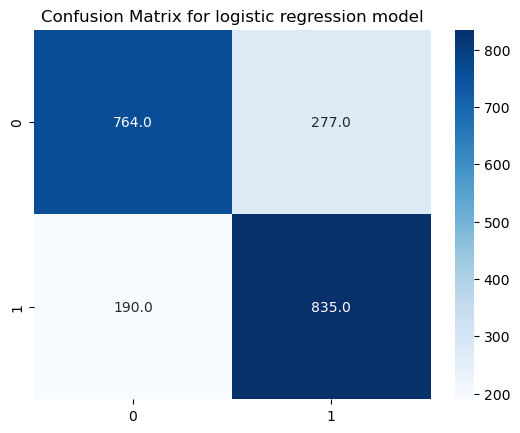

In [319]:
# Confusion matrix with values
logregmodel_matrix = sns.heatmap(logregmodel_cfmatrix, annot= True, fmt=".1f", cmap = plt.cm.Blues)
plt.title('Confusion Matrix for logistic regression model')
plt.show()

<Axes: >

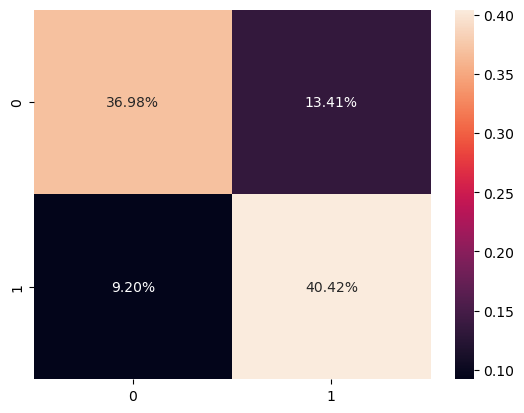

In [320]:
# Confusion Matrix in percentages
sns.heatmap(logregmodel_cfmatrix/np.sum(logregmodel_cfmatrix), annot=True, fmt='.2%')

<Axes: >

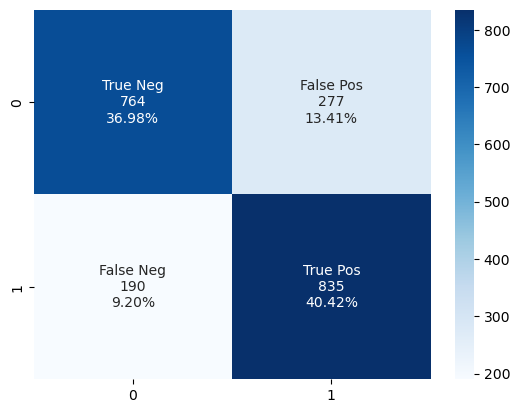

In [321]:
# Confusion Matrix with labels
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in logregmodel_cfmatrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in logregmodel_cfmatrix.flatten()/np.sum(logregmodel_cfmatrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(logregmodel_cfmatrix, annot=labels, fmt="", cmap = 'Blues')

####  Simple Model #002

**Support Vector Machine Model**

In [322]:
#Create the Model
svcmodel = SVC(kernel = 'linear', random_state =1 , probability = True)

In [323]:
#Train the model
svcmodel.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=1)

In [324]:
#Predict on a unknown dataset(Testset)
# Use .predict method # .predict_proba is available just for classification
svc_predict = svcmodel.predict(X_test)

In [325]:
#Find accuracy
svcmodel_accuracy = round(metrics.accuracy_score(y_test,svc_predict )*100,2)
svcmodel_accuracy

74.39

In [326]:
#Find precision
svcmodel_precision = round(metrics.precision_score(y_test,svc_predict )*100,2)
svcmodel_precision

70.26

In [327]:
#Find f1_score
svcmodel_f1score = round(metrics.f1_score(y_test,svc_predict )*100,2)
svcmodel_f1score

76.48

In [328]:
#Find recall
svcmodel_recall = round(metrics.recall_score(y_test,svc_predict )*100,2)
svcmodel_recall

83.9

In [329]:
# Creating the confusion matrix
svcmodel_cfmatrix = confusion_matrix(y_test,svc_predict)
svcmodel_cfmatrix

array([[677, 364],
       [165, 860]], dtype=int64)

<Axes: >

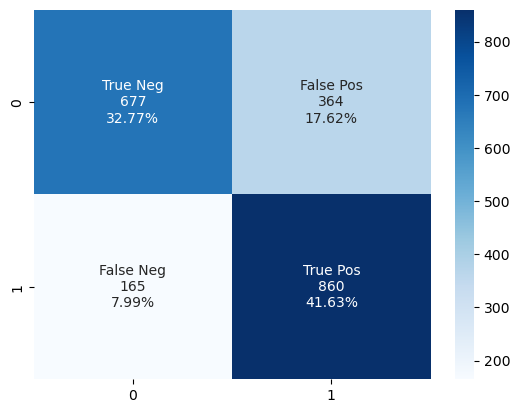

In [330]:
# Confusion Matrix with labels
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in svcmodel_cfmatrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in svcmodel_cfmatrix.flatten()/np.sum(svcmodel_cfmatrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(svcmodel_cfmatrix, annot=labels, fmt="", cmap = 'Blues')

#### Simple Model #003

**K-Nearest Neighbor**

In [331]:
# Create the model
knnmodel = KNeighborsClassifier(n_neighbors = 5, metric= 'minkowski', p =2)

In [332]:
#Train the model
knnmodel.fit(X_train, y_train)

KNeighborsClassifier()

In [333]:
#Predict on a unknown dataset(Testset)
# Use .predict method # .predict_proba is available just for classification
knnmodel_predict = knnmodel.predict(X_test)

In [334]:
#Find accuracy
knnmodel_accuracy = round(metrics.accuracy_score(y_test,knnmodel_predict )*100,2)
knnmodel_accuracy

79.04

In [335]:
#Find precision
knnmodel_precision = round(metrics.precision_score(y_test,knnmodel_predict )*100,2)
knnmodel_precision

74.5

In [336]:
#Find f1_score
knnmodel_f1score = round(metrics.f1_score(y_test,knnmodel_predict )*100,2)
knnmodel_f1score

80.61

In [337]:
#Find recall
knnmodel_recall = round(metrics.recall_score(y_test,knnmodel_predict )*100,2)
knnmodel_recall

87.8

In [338]:
# Creating the confusion matrix
knnmodel_cfmatrix = confusion_matrix(y_test,knnmodel_predict)
knnmodel_cfmatrix

array([[733, 308],
       [125, 900]], dtype=int64)

<Axes: >

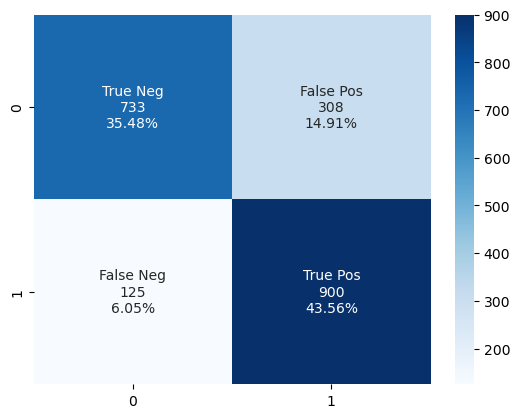

In [339]:
# Confusion Matrix with labels
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in knnmodel_cfmatrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in knnmodel_cfmatrix.flatten()/np.sum(knnmodel_cfmatrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(knnmodel_cfmatrix, annot=labels, fmt="", cmap = 'Blues')

#### Simple Model #004

**Random Forest Classifier Model**

In [340]:
#Create the model
rfmodel = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=1)

In [341]:
#Train the model
# Use the .fit method to fit the model
rfmodel.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

In [342]:
#Predict on a unknown dataset(Testset)
# Use .predict method # .predict_proba is available just for classification
rfmodel_predict = rfmodel.predict(X_test)

In [343]:
# Find accuracy
rfmodel_accuracy = round(metrics.accuracy_score(y_test,rfmodel_predict)*100,2)
rfmodel_accuracy

84.8

In [344]:
# Find precision
rfmodel_precision = round(metrics.precision_score(y_test,rfmodel_predict)*100,2)
rfmodel_precision

84.55

In [345]:
# Find f1score
rfmodel_f1score= round(metrics.f1_score(y_test,rfmodel_predict)*100,2)
rfmodel_f1score

84.71

In [346]:
# Find recall
rfmodel_recall= round(metrics.recall_score(y_test,rfmodel_predict)*100,2)
rfmodel_recall

84.88

In [347]:
#Creating the confusion matrix
rfmodel_cfmatrix = confusion_matrix(y_test,rfmodel_predict)
rfmodel_cfmatrix

array([[882, 159],
       [155, 870]], dtype=int64)

<Axes: >

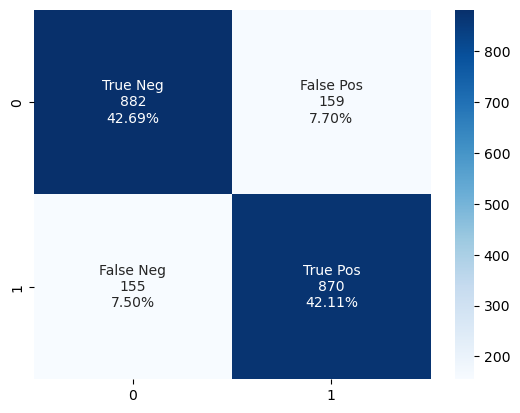

In [348]:
# Confusion Matrix with labels
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in rfmodel_cfmatrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in rfmodel_cfmatrix.flatten()/np.sum(rfmodel_cfmatrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(rfmodel_cfmatrix, annot=labels, fmt="", cmap = 'Blues')

### MODELS COMPARISON

In [349]:
model_comparison = pd.DataFrame ({
     'Accuracy Score': [logregmodel_accuracy,svcmodel_accuracy,knnmodel_accuracy,rfmodel_accuracy],
     'Precision Score': [logregmodel_precision,svcmodel_precision,knnmodel_precision,rfmodel_precision],
     'Recall Score': [logregmodel_recall,svcmodel_recall,knnmodel_recall,rfmodel_recall],
     'F1 Score': [logregmodel_f1score,svcmodel_f1score,knnmodel_f1score,rfmodel_f1score],
     'Model_Name': ['Logistic Regression','Support Vector Machine','K-Nearest Neighbor','Random Forest'] })

model_comparison_df = model_comparison.sort_values(by='Accuracy Score',ascending=False)
model_comparison_df = model_comparison_df.set_index('Accuracy Score')
model_comparison_df.reset_index()

Accuracy Score  Precision Score  Recall Score  F1 Score  \
0           84.80            84.55         84.88     84.71   
1           79.04            74.50         87.80     80.61   
2           77.40            75.09         81.46     78.15   
3           74.39            70.26         83.90     76.48   

               Model_Name  
0           Random Forest  
1      K-Nearest Neighbor  
2     Logistic Regression  
3  Support Vector Machine

### HYPERPARAMETERS TUNING

#### Use GridSearchCV
#### Hyperparameters tuning on Logistic Regression Model

In [350]:
# Define the logistic regression model
logreg = logregmodel

In [351]:
# Define the hyperparameter grid to search through
para_grid = { 'C' : [0.1, 1, 10],
            'penalty' : ['l1', 'l2']}

In [352]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid = para_grid, scoring= 'accuracy', cv = 5)

In [353]:
# Fit the GridSearchCV object to the data
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [354]:
# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [355]:
best_params

{'C': 0.1, 'penalty': 'l2'}

In [356]:
best_score

0.7702885645373382

#### Hyperparameters tuning on Random Forest Classifier

In [357]:
param_grid = { 'bootstrap' : [True], 
             'max_depth': [5,10,None],
             'max_features' : ['sqrt', 'log2'],
             'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [358]:
rf = rfmodel

In [359]:
grid_search_rf = GridSearchCV(estimator=rf, param_grid= param_grid, cv = 3, verbose = 0, return_train_score= True)

In [360]:
grid_search_rf.fit(X,y)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=1),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True)

In [361]:
# Check the best parameter by using the best_params_ function
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

In [362]:
best_params_rf

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 15}

In [363]:
best_score_rf

0.8314933178384661

#### Hyperparameters tuning on SVC

In [364]:
svc = svcmodel

In [365]:
param_grid_svc = { 'C' : [0.1, 1, 10],
            'kernel' : ['linear', 'rbf']}

In [366]:
grid_search_svc = GridSearchCV(estimator=svc, param_grid= param_grid_svc, cv = 3)

In [367]:
grid_search_svc.fit(X,y)

GridSearchCV(cv=3,
             estimator=SVC(kernel='linear', probability=True, random_state=1),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [368]:
# Check the best parameter by using the best_params_ function
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_

In [369]:
best_params_svc

{'C': 10, 'kernel': 'rbf'}

In [370]:
best_score_svc

0.8192911098198721

## Train the model with best parameters

In [372]:
rf_final = RandomForestClassifier( bootstrap= True, max_depth=None, max_features='log2', n_estimators=15)

In [373]:
rf_final.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=15)

In [374]:
rf_final_pred = rf_final.predict(X_test)

In [377]:
#Accuracy Score
rf_final_acc = round(metrics.accuracy_score(y_test, rf_final_pred)*100,2)
rf_final_acc

83.59

In [378]:
#Precision Score
rf_final_precision = round(metrics.precision_score(y_test, rf_final_pred)*100,2)
rf_final_precision

83.17

In [379]:
#Recall Score
rf_final_recall = round(metrics.recall_score(y_test, rf_final_pred)*100,2)
rf_final_recall

83.9

In [380]:
#F1 Score
rf_final_f1 = round(metrics.f1_score(y_test, rf_final_pred)*100,2)
rf_final_f1

83.54

## EXPORT KEY COMPONENTS

Here is the section to export the important ML objects that will be use to develop an app: Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc.

In [381]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app
# Assuming encoder, scaler, column_transformer, model, pipeline are the ML objects you want to export
encoder = onehot_encoder
scaler = StandardScaler
model = rf_final

In [382]:
# Export the objects using pickle
with open("LP3 MODEL", 'wb') as file:
    pickle.dump({
        'encoder': encoder,
        'scaler': scaler,
        'model': model,
    }, file)

In [383]:
# Load the exported objects from the file
with open("LP3 MODEL", 'rb') as file:
    loaded_objects = pickle.load(file)

In [384]:
# Retrieve the objects from the loaded dictionary
encoder = loaded_objects['encoder']
scaler = loaded_objects['scaler']
model = loaded_objects['model']
# You can now use the loaded objects in your app or script

In [385]:
encoder

OneHotEncoder(sparse=False, sparse_output=False)

In [386]:
model

RandomForestClassifier(max_features='log2', n_estimators=15)

In [387]:
scaler

sklearn.preprocessing._data.StandardScaler

You can replace encoder, scaler, column_transformer, model, and pipeline with the corresponding ML objects that you want to export.

By exporting and loading these ML objects using pickle, you can reuse them in your app or other Python scripts without the need to retrain the models or reapply the preprocessing steps.